# Regresión Lineal: Metodo Iterativo
### Valeria Pérez Cong Sánchez 145009

In [135]:
import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


reglin=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/incremental_lr/regLin.csv")


In [136]:
reglin.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [137]:
#n Implementar LMS en Python
#n Probar con reglin.csv con h= 0.05
#n Graficar como va cambiando el error para cada w
#n Pruebe enstandarizar los datos
#n Repita el experimento para h= 0.1 y 1
#n Escriba sus observaciones

## Separamos el set y normalizamos los datos

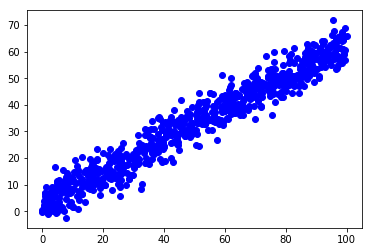

In [138]:
#Separamos el set
X_train, X_test, y_train, y_test=train_test_split(reglin[['X']],reglin[['y']],test_size=0.25)

#Convertimos en numpy array
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

#graficamos
plt.plot(X_train, y_train, 'bo')
plt.show()

In [139]:
#Normalizamos el set de X
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Normalizamos el set de Y
#y_train, y_test
scaler_y = preprocessing.StandardScaler().fit(y_train)

y_train=scaler_y.transform(y_train)
y_test=scaler_y.transform(y_test)

In [140]:
#osea para una specific row y un arreglo de coef
#recorres el renglón y haces una predicción para cada xi según b0 y b1
def predict (row, coeficientes):
    y_pred=coeficientes[0] #y_pred=b0
    for i in range (len(row)-1): #range ==(0,1) porque len(row)=2
        y_pred= y_pred + coeficientes[i+1]*row[i]#row[i] es mi xi
        #y_pred=b0 + b1*x1        
    return y_pred

#juntamos la x y la y en un solo set de entrenamiento 
dataset=np.concatenate((X_train,y_train), axis=1)

#coeficientes=[1,1]
coeficientes=np.ones((len(X_train[0]))+1 )## coef==[1,1]
for row in dataset: #para cada renglon del set
    y_pred=predict(row,coeficientes)
    y_real=row[1]
    error=y_real-y_pred
    #print("Expected=%.3f, Predicted=%.3f" % (y_real, y_pred))
    #print("Error=%.3f" % (error))
    #print(row)
    #print("x=%.3f, y=%.3f" % (row[0],row[1]))

#tenemos que hacer una función que actualize los coeficientes para cada renglón del training data
#para lograrlo tenemos que calcular el error entre el valor real de y, y el
#valor predicho

#error = predicción - valor_real
#b1(t) = b1(t-1) + learning_rate * error(t-1) * x1(t-1)
#b0(t) = b0(t-1) - learning_rate * error(t-1) #vemos que no hay x en b0

def calcular_coeficientes (data,learning_rate):
    #coeficientes=[1,1]
    coeficientes=np.ones((len(X_train[0]))+1 )## coef==[1,1]
    sum_error=0
    b1=[]
    errores=[]
    for row in data:
        y_pred=predict(row,coeficientes)
        y_real=row[1]
        error=y_real-y_pred
        sum_error=sum_error + error**2
        coeficientes[0]=coeficientes[0]+learning_rate*error #i.e b0= b0+learning_rate*error
        
        for i in range(len(row)-1):
            coeficientes[i+1]=coeficientes[i+1]+learning_rate*error*row[i] #i.e b1=b1+lr*error*x
    return coeficientes
            

## Coeficientes w0 y w1 con learning_rate de 0.01

In [148]:
print (calcular_coeficientes (dataset,0.01))

[ 0.02118372  0.96691986]


## Coeficientes w0 y w1 con learning_rate de 0.05

In [141]:
print (calcular_coeficientes (dataset,0.05))

[ 0.02686413  1.00027268]


## Coeficientes w0 y w1 con learning_rate de 0.1

In [142]:
print (calcular_coeficientes (dataset,0.01))

[ 0.02118372  0.96691986]


## Coeficientes w0 y w1 con learning_rate de 1

In [143]:
print (calcular_coeficientes (dataset,1))

[-44.21657014  47.49897987]


## Comparamos los resultados con los de una regresión lineal "normal"

In [144]:
## Hacemos el fit del modelo con la train set
lm=linear_model.LinearRegression()
#entrenamos
modelo=lm.fit(X_train,y_train)
#Los coeficientes 
print('Intercepto w0: \n', lm.intercept_)
print('Coeficiente w1: \n', lm.coef_)


Intercepto w0: 
 [ -4.51503818e-17]
Coeficiente w1: 
 [[ 0.97301576]]


Podemos ver que w1 sí se acerca a los valores de una regresión lineal "normal" cuando el learning_rate es 0.01 o 0.1. 